### Disney Dataset Creation (w/ Python BeautifulSoup)
Scrape & clean a list of disney wikipedia pages to create a dataset to further analyze.
#### Import necessary libraries

In [1]:
import requests
from bs4 import BeautifulSoup as bs

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")

# Convert to Beautiful soup object
soup = bs(r.content)

# Print out HTML
contents = soup.prettify()

### Task #1: Get Info Box (store in Python dictionary)

In [3]:
info_box = soup.find(class_="infobox vevent")
info_rows = info_box.find_all("tr")
for i in range(10):
    print(info_rows[i].prettify())
    print()

<tr>
 <th class="summary" colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size:110%;font-style:italic;">
  Toy Story 3
 </th>
</tr>


<tr>
 <td colspan="2" style="text-align:center">
  <a class="image" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3.">
   <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
  </a>
  <div style="font-size:95%;padding:0.35em 0.35em 0.25em;line-height:1.25em;">
   Theatrical release poster
  </div>
 </td>
</tr>


<tr>
 <th scope="row" style="white-space:now

In [4]:
TITLE_ROW = 0
IMAGE_ROW = 1

movie_info = {}
for index, row in enumerate(info_rows):
    try:
        if index == TITLE_ROW:
            movie_info['title'] = row.find('th').get_text(" ", strip=True)
        elif index == IMAGE_ROW:
            continue
        else: 
            content_key = row.find('th').get_text(" ", strip=True)
            content_value = get_content_value(row.find('td'))
            movie_info[content_key] = content_value
    except Exception as e:
        print("Index", index)
        print(e)

def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text().replace("\xa0", " ") for li in row_data.find_all("li")]
    else:
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")
       

    
movie_info

Index 2
name 'get_content_value' is not defined
Index 3
name 'get_content_value' is not defined
Index 4
name 'get_content_value' is not defined
Index 5
name 'get_content_value' is not defined
Index 6
name 'get_content_value' is not defined
Index 7
name 'get_content_value' is not defined
Index 8
name 'get_content_value' is not defined
Index 9
name 'get_content_value' is not defined
Index 10
name 'get_content_value' is not defined
Index 11
name 'get_content_value' is not defined
Index 12
name 'get_content_value' is not defined
Index 13
name 'get_content_value' is not defined
Index 14
name 'get_content_value' is not defined
Index 15
name 'get_content_value' is not defined
Index 16
name 'get_content_value' is not defined
Index 17
name 'get_content_value' is not defined


{'title': 'Toy Story 3'}

In [5]:
def get_info_box(url):
    TITLE_ROW = 0
    
    r = requests.get(url)
    soup = bs(r.content)
    info_box = soup.find(class_="infobox vevent")
    info_rows = info_box.find_all("tr")
    
    clean_tags(soup)

    movie_info = {}
    for index, row in enumerate(info_rows):
        if index == TITLE_ROW:
            movie_info['title'] = row.find('th').get_text(" ", strip=True)
        else:
            header = row.find('th')
            if header:
                content_key = header.get_text(" ", strip=True)
                content_value = get_content_value(row.find('td'))
                movie_info[content_key] = content_value

    return movie_info

def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    elif row_data.find("br"):
        return [text.strip() for text in row_data.stripped_strings]
    else:
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")
    
def clean_tags(soup):
    for tag in soup(['span', 'sup']):
        tag.decompose()

### Task #2: Get info box json for all movies

In [6]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")

# Convert to Beautiful soup object
soup = bs(r.content)

In [33]:
movies = soup.select("table.wikitable.sortable i:first-child")
print(movies[0].a['href'])
base_path = "https://en.wikipedia.org/"
full_path = base_path + movies[0].a['href']

movie_info_list = []
failure_list = []
for index, movie in enumerate(movies):
    if index % 10 == 0:
        print(index)
    try:
        full_path = base_path + movie.a['href']
        movie_info_list.append(get_info_box(full_path))
    except Exception as e:
        failure_list.append(movie.get_text())

/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440


['Zorro the Avenger',
 'The Sign of Zorro',
 'True-Life Adventures',
 'Escape from the Dark',
 'The Omega Connection',
 'Le Premier Cri',
 'Trail of the Panda',
 'Growing Up Wild',
 'Expedition China',
 'Luca',
 'Encanto']

In [35]:
base_path = "https://en.wikipedia.org/"
url = base_path + "/wiki/Tarzan_(1999_film)"
results = get_info_box(url)
results

{'title': 'Tarzan',
 'Directed by': ['Kevin Lima', 'Chris Buck'],
 'Produced by': 'Bonnie Arnold',
 'Screenplay by': ['Tab Murphy', 'Bob Tzudiker', 'Noni White'],
 'Story by': ['Stephen Anderson',
  'Mark D. Kennedy',
  'Carole Holliday',
  'Gaëtan Brizzi',
  'Paul Brizzi',
  'Don Dougherty',
  'Ed Gombert',
  'Randy Haycock',
  'Don Hall',
  'Kevin L. Harkey',
  'Glen Keane',
  'Burny Mattinson',
  'Frank Nissen',
  'John Norton',
  'Jeff Snow',
  'Michael Surrey',
  'Christopher J. Ure',
  'Mark Walton',
  'Stevie Wermers',
  'Kelly Wightman',
  'John Ramirez'],
 'Based on': ['Tarzan of the Apes', 'by', 'Edgar Rice Burroughs'],
 'Starring': ['Tony Goldwyn',
  'Minnie Driver',
  'Glenn Close',
  'Alex D. Linz',
  "Rosie O'Donnell",
  'Brian Blessed',
  'Nigel Hawthorne',
  'Lance Henriksen',
  'Wayne Knight',
  'Taylor Dempsey'],
 'Music by': 'Mark Mancina',
 'Edited by': 'Gregory Perler',
 'Production companies': ['Walt Disney Pictures',
  'Walt Disney Feature Animation'],
 'Distribu

### Save/Reload Movie Data

In [40]:
import json

def save_data(title, data):
    with open(title, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

In [39]:
import json

def load_data(title):
    with open(title, encoding='utf-8') as f:
        return json.load(f)

### Task #3: Clean the Data

#### Clean up references "[1]"

In [21]:
# Done

#### Split the long strings

In [22]:
# Done

#### Minutes String to Integer

In [23]:
def minute_to_integer(running_time):
    if running_time == "N/A":
        return "N/A"
    if isinstance(running_time, list):
        # Get first item in list
        return int(running_time[0].split(" ")[0])
    else: # is a string
        return int(running_time.split(" ")[0])
    

test = []
test2 = []
for movie in movie_info_list:
    movie['Running Time (num)'] = minute_to_integer(movie.get('Running time', 'N/A'))
    
movie_info_list[-10]

{'title': 'Hamilton',
 'Directed by': 'Thomas Kail',
 'Produced by': ['Thomas Kail', 'Lin-Manuel Miranda', 'Jeffrey Seller'],
 'Written by': 'Lin-Manuel Miranda',
 'Based on': ['Alexander Hamilton', 'by', 'Ron Chernow'],
 'Starring': ['Daveed Diggs',
  'Renée Elise Goldsberry',
  'Jonathan Groff',
  'Christopher Jackson',
  'Jasmine Cephas Jones',
  'Lin-Manuel Miranda',
  'Leslie Odom Jr.',
  'Okieriete Onaodowan',
  'Anthony Ramos',
  'Phillipa Soo'],
 'Music by': 'Lin-Manuel Miranda',
 'Cinematography': 'Declan Quinn',
 'Edited by': 'Jonah Moran',
 'Production company': ['Walt Disney Pictures',
  '5000 Broadway Productions',
  'Nevis Productions',
  'Old 320 Sycamore Pictures',
  'RadicalMedia'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release date': ['July 3, 2020'],
 'Running time': '160 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$12.5 million (stage production)',
 'Running Time (num)': 160}

#### Budget & Box office to number

In [25]:
# List out all budgets from videos
budgets = [movie['Box office'] for movie in movie_info_list if 'Box office' in movie]
print(budgets)

['$418 million', '$164 million', '$76.4–$83.3 million', '$960,000 (worldwide rentals)', '$1.3 million (est. United States/Canada rentals, 1941)', '$267.4 million', '$1,135,000 (worldwide rentals)', '$799,000', '$3,355,000 (worldwide rentals)', '$3,275,000 (worldwide rentals)', '$65 million', '$3,165,000 (worldwide rentals)', '$2,560,000 (worldwide rentals)', '$3.7 million (U.S. rental) $575,000 (foreign rental)', '$1,625,000 (worldwide rentals)', '$263.6 million', '$4,100,000 (worldwide rentals)', '$5.6 million (US, 1951)', '$2.1 million (US rentals)', '$87.4 million', '$1 million (US)', '$2.6 million (US)', '$1.75 million (US and Canadian rentals)', '$28.2 million', '$2,150,000 (US)', '$187 million', '$2.1 million (US)', '$1.6 million (US)', '$1.7 million (US)', '$2.75 million (US)', '$1.75 million (US rentals)', '$6,250,000 (US/Canada rentals)', '$1.8 million (est. US/ Canada rentals)', '$2.5 million (est. US/ Canada rentals)', '$51.6 million (United States/Canada)', '$12.3 million (

In [ ]:
def dollar_to_integer(amount):
    if amount == "N/A":
        return "N/A"
    if isinstance(running_time, list):
        # Get first item in list
        return int(amount[0].split(" ")[0])
    else: # is a string
        return int(amount.split(" ")[0])
    

    

In [30]:
import re

amounts = r"thousand|million|billion"
number = r"\d+(,\d{3})*\.*\d*"
standard = fr"\${number}(-|\sto\s)?({number})?\s({amounts})"

def word_to_value(word):
    value_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000}
    return value_dict.get(word.lower(), 1)

def parse_word_syntax(string):
    stripped_string = string.replace(",", "")
    value = float(re.search(number, stripped_string).group())
    modifier = word_to_value(re.search(amounts, string, flags=re.I).group())
    return value*modifier

def parse_value_syntax(string):
    stripped_string = string.replace(",", "")
    return float(re.search(number, stripped_string).group())

def money_conversion(money):
    if money == "N/A":
        return "N/A"
    if type(money) == list:
        money = money[0]

    word_syntax = re.search(standard, money, flags=re.I)
    value_syntax = re.search(fr"\${number}", money)

    if word_syntax:
        return parse_word_syntax(word_syntax.group())
    elif value_syntax:
        return parse_value_syntax(value_syntax.group())
    else:
        return None

In [31]:
movie_info_list[-40]

{'title': 'March of the Penguins',
 'Directed by': 'Luc Jacquet',
 'Produced by': ['Yves Darondeau', 'Christophe Lioud', 'Emmanuel Priou'],
 'Written by': ['Luc Jacquet',
  'Michel Fessler',
  'Jordan Roberts (English Version)'],
 'Narrated by': ['Amitabh Bachchan (Hindi)',
  'Charles Berling (French)',
  'Romane Bohringer (French)',
  'Jules Sitruk (French)',
  'Morgan Freeman (English)',
  'Sharon Cuneta ( Filipino )'],
 'Music by': ['Émilie Simon (France)', 'Alex Wurman (US)'],
 'Cinematography': ['Laurent Chalet', 'Jérôme Maison'],
 'Edited by': 'Sabine Emiliani',
 'Production company': ['Wild Bunch',
  'National Geographic Films',
  'Bonne Pioche'],
 'Distributed by': 'Buena Vista International France',
 'Release date': ['26 January 2005'],
 'Running time': '80 minutes',
 'Country': 'France',
 'Language': 'French',
 'Budget': '$8 million',
 'Box office': '$127.4 million',
 'Running Time (num)': 80,
 'Budget (num)': 8000000.0,
 'Box office (num)': 127400000.0}

In [28]:
for movie in movie_info_list:
    movie['Budget (num)'] = money_conversion(movie.get('Budget', "N/A"))
    movie['Box office (num)'] = money_conversion(movie.get('Box office', "N/A"))

In [100]:
movie_info_list[5]

{'title': 'Dumbo',
 'Directed by': ['Supervising director:',
  'Ben Sharpsteen',
  'Sequence directors:',
  'Norman Ferguson',
  'Wilfred Jackson',
  'Bill Roberts',
  'Jack Kinney',
  'Samuel Armstrong'],
 'Produced by': 'Walt Disney',
 'Story by': ['Otto Englander', 'Joe Grant', 'Dick Huemer'],
 'Based on': ['Dumbo, the Flying Elephant',
  'by',
  'Helen Aberson',
  'Harold Pearl'],
 'Starring': ['Edward Brophy',
  'Herman Bing',
  'Margaret Wright',
  'Sterling Holloway',
  'Verna Felton',
  'Cliff Edwards',
  'James Baskett',
  'Nick Stewart',
  'Hall Johnson',
  'Jim Carmichael'],
 'Narrated by': 'John McLeish',
 'Music by': ['Frank Churchill', 'Oliver Wallace'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release date': ['October 23, 1941 (New York City)',
  'October 31, 1941 (U.S.)'],
 'Running time': '64 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$950,000',
 'Box office': '$1.3 million (est. United

In [134]:
from datetime import datetime

# List out all release dates from videos
dates = [movie['Release date'] for movie in movie_info_list if 'Release date' in movie]
#print(dates)
dates = [x.split("(")[0].strip() if type(x)==str else x[0].split("(")[0].strip() for x in dates]


def date_conversion(date):
    date_str = clean_date(date)
    
    for fmt in ["%B %d, %Y", "%d %B %Y"]:
        try:
            return datetime.strptime(date_str, fmt)
        except:
            pass
    return None

def clean_date(date):
    if type(date) == list:
        date = date[0]
        
    return date.split("(")[0].strip()


In [135]:
for movie in movie_info_list:
    movie['Release date (fmt)'] = date_conversion(movie.get('Release date', "N/A"))

In [136]:
movie_info_list[-10]

{'title': 'Hamilton',
 'Directed by': 'Thomas Kail',
 'Produced by': ['Thomas Kail', 'Lin-Manuel Miranda', 'Jeffrey Seller'],
 'Written by': 'Lin-Manuel Miranda',
 'Based on': ['Alexander Hamilton', 'by', 'Ron Chernow'],
 'Starring': ['Daveed Diggs',
  'Renée Elise Goldsberry',
  'Jonathan Groff',
  'Christopher Jackson',
  'Jasmine Cephas Jones',
  'Lin-Manuel Miranda',
  'Leslie Odom Jr.',
  'Okieriete Onaodowan',
  'Anthony Ramos',
  'Phillipa Soo'],
 'Music by': 'Lin-Manuel Miranda',
 'Cinematography': 'Declan Quinn',
 'Edited by': 'Jonah Moran',
 'Production company': ['Walt Disney Pictures',
  '5000 Broadway Productions',
  'Nevis Productions',
  'Old 320 Sycamore Pictures',
  'RadicalMedia'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release date': ['July 3, 2020'],
 'Running time': '160 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$12.5 million (stage production)',
 'Running Time (num)': 160,
 'Budget (num)': 12500000.0,
 'Box off

### Task #4: Attach IMDB/Rotton Tomatoes scores

In [32]:
import requests
import urllib
import os

def get_omdb_info(title):
    base_url = "http://www.omdbapi.com/?"
    params = {'apikey': os.environ['OMDB_API_KEY'], 't': title}
    params_encoded = urllib.parse.urlencode(params)
    full_url = base_url+params_encoded
    response_dict = requests.get(base_url + params_encoded).json()
    return response_dict

def get_rotten_tomato_score(omdb_info):
    ratings = omdb_info.get('Ratings', [])
    for rating in ratings:
        if rating['Source'] == 'Rotten Tomatoes':
            return rating['Value']
    return 'N/A'

print(get_omdb_info('tarzan'))

{'Title': 'Tarzan', 'Year': '1999', 'Rated': 'G', 'Released': '18 Jun 1999', 'Runtime': '88 min', 'Genre': 'Animation, Adventure, Family, Romance', 'Director': 'Chris Buck, Kevin Lima', 'Writer': 'Tab Murphy (screenplay), Bob Tzudiker (screenplay), Noni White (screenplay), Stephen J. Anderson (story), Mark Kennedy (story), Carole Holliday (story), Gaëtan Brizzi (story), Paul Brizzi (story), Don Dougherty (story), Ed Gombert (story), Randy Haycock (story), Don Hall (story), Kevin Harkey (story), Glen Keane (story), Burny Mattinson (story), Frank Nissen (story), John Norton (story), Jeff Snow (story), Michael Surrey (story), Chris Ure (story), Mark Walton (story), Stevie Wermers (story), Kelly Wightman (story), John Ramirez (story), Edgar Rice Burroughs (story "Tarzan of the Apes")', 'Actors': 'Brian Blessed, Glenn Close, Minnie Driver, Tony Goldwyn', 'Plot': 'A man raised by gorillas must decide where he really belongs when he discovers he is a human.', 'Language': 'English', 'Country':

In [33]:
#new_movie_info = []
for index, movie in enumerate(movie_info_list):
    title = movie['title']
    omdb_info = get_omdb_info(title)
    movie['imdb'] = omdb_info.get('imdbRating', 'N/A')
    movie['metascore'] = omdb_info.get('Metascore', 'N/A')
    movie['rotten_tomatoes'] = get_rotten_tomato_score(omdb_info)
    
movie_info_list[-1]

{'title': 'The Beatles: Get Back',
 'Directed by': 'Peter Jackson',
 'Produced by': ['Peter Jackson', 'Clare Olssen', 'Jonathan Clyde'],
 'Starring': 'The Beatles',
 'Music by': 'The Beatles',
 'Edited by': 'Jabez Olssen',
 'Production companies': ['Walt Disney Pictures',
  'Apple Corps',
  'WingNut Films'],
 'Distributed by': ['Walt Disney Studios', 'Motion Pictures'],
 'Release date': ['27 August 2021'],
 'Country': ['United Kingdom', 'New Zealand', 'United States'],
 'Language': 'English',
 'Running Time (num)': 'N/A',
 'Budget (num)': None,
 'Box office (num)': None,
 'imdb': '8.0',
 'metascore': 'N/A',
 'rotten_tomatoes': 'N/A'}

In [82]:
movie_info_list[-32]['Release date'][0]

'February 26, 2018 ( El Capitan Theatre )'

### Task #5: Data formatting

#### Save as Json

In [137]:
# Done
save_data('full_disney_dataset.json', movie_info_list)

TypeError: Object of type datetime is not JSON serializable

#### Save as CSV

In [140]:
import pandas as pd
import numpy as np

df = pd.DataFrame(movie_info_list)

In [141]:
df = df.replace("N/A", np.nan)
result = df.sort_values(['Running Time (num)'], ascending=True)
result.head(10)

,title,Production company,Release date,Running time,Country,Language,Running Time (num),Budget (num),Box office (num),imdb,...,Story by,Color process,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Adaptation by,Traditional,Simplified
291,Roving Mars,"[Walt Disney Pictures, White Mountain Films, T...","[January 27, 2006]",40 minutes,United States,English,40.0,1000000.0,11000000.0,7.2,...,NaN,NaN,Paul Newman (introduction only),T.C. Christensen,Nancy Baker,NaN,NaN,NaN,NaN,NaN
274,Sacred Planet,Walt Disney Pictures,"[April 22, 2004]",40 minutes,"[Canada, Malaysia, United States]",English,40.0,NaN,1108356.0,6.0,...,NaN,NaN,Robert Redford,William Reeve,Jon Long,NaN,NaN,NaN,NaN,NaN
0,Academy Award Review of,Walt Disney Productions,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,41.0,NaN,NaN,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Saludos Amigos,Walt Disney Productions,"[August 24, 1942 (World Premiere-Rio de Janeir...",42 minutes,United States,"[English, Portuguese, Spanish]",42.0,NaN,1135000.0,6.1,...,"[Homer Brightman, William Cottrell, Richard Hu...",NaN,Fred Shields,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,A Tale of Two Critters,Walt Disney Productions,"[June 22, 1977]",48 minutes,United States,English,48.0,NaN,NaN,7.1,...,NaN,NaN,Mayf Nutter,NaN,G. Gregg McLaughlin,Jack Speirs,NaN,NaN,NaN,NaN
268,The Young Black Stallion,"[Walt Disney Pictures, The Kennedy/Marshall Co...","[December 25, 2003]",50 minutes,United States,English,50.0,NaN,9638389.0,5.6,...,NaN,NaN,NaN,Reed Smoot,"[Bud Smith, Terry Blythe, M. Scott Smith]",Jeanne Rosenberg,NaN,NaN,NaN,NaN
24,The Vanishing Prairie,Walt Disney Productions,"[August 17, 1954]","[60 minutes (VHS version), 71 minutes (original)]",United States,English,60.0,NaN,1750000.0,7.7,...,NaN,NaN,Winston Hibler,N. Paul Kenworthy,Lloyd L. Richardson,NaN,NaN,NaN,NaN,NaN
260,Ghosts of the Abyss,"[Walt Disney Pictures, Walden Media, Earthship...","[March 31, 2003 (premiere), April 11, 2003 (li...",61 minutes,United States,English,61.0,13000000.0,28700000.0,6.8,...,NaN,NaN,NaN,"[Vince Pace, D. J. Roller]","[David C. Cook, Ed W. Marsh, Sven Pape, John R...",NaN,NaN,NaN,NaN,NaN
5,Dumbo,Walt Disney Productions,"[October 23, 1941 (New York City), October 31,...",64 minutes,United States,English,64.0,950000.0,1300000.0,7.2,...,"[Otto Englander, Joe Grant, Dick Huemer]",NaN,John McLeish,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Victory Through Air Power,Walt Disney Productions,"[July 17, 1943]",65 min.,United States,English,65.0,788000.0,799000.0,6.6,...,NaN,NaN,Art Baker,Ray Rennahan,Jack Dennis,NaN,NaN,NaN,NaN,NaN


In [144]:
df["year"] = df['Release date (fmt)'].dt.year

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 434 non-null    object        
 1   Production company    395 non-null    object        
 2   Release date          433 non-null    object        
 3   Running time          425 non-null    object        
 4   Country               430 non-null    object        
 5   Language              432 non-null    object        
 6   Running Time (num)    425 non-null    float64       
 7   Budget (num)          272 non-null    float64       
 8   Box office (num)      357 non-null    float64       
 9   imdb                  417 non-null    object        
 10  metascore             285 non-null    object        
 11  rotten_tomatoes       315 non-null    object        
 12  Release date (fmt)    430 non-null    datetime64[ns]
 13  Directed by         

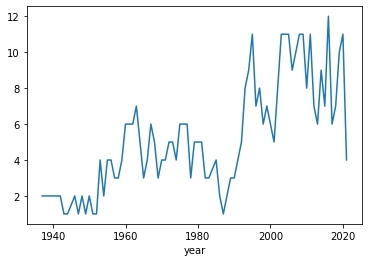

In [155]:
df.groupby(["year"])['title'].count().plot()
